In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
grade_std = pd.read_csv("D:\Amir Ali\Data Science\Datasets projects\dataset4-main\Grades.csv")
grade_std

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
grade_std.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# EDA

In [4]:
grade_std.shape

(571, 43)

In [5]:
grade_std.columns.to_list()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [6]:
#as we can see we have two variable with odd names lets rename those for future ease.
grade_std.rename(columns = {'HS-105/12': 'HS-105', 'HS-205/20':'HS-205'}, inplace = True)
grade_std.head(2)

,Seat No.,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008


In [7]:
#lest check null values
grade_std.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       1
HS-105       1
MT-111       2
CS-105       0
CS-106       2
EL-102       2
EE-119       2
ME-107       2
CS-107       2
HS-205       5
MT-222       5
EE-222       7
MT-224       7
CS-210       7
CS-211       5
CS-203       5
CS-214       6
EE-217       6
CS-212       6
CS-215       6
MT-331       9
EF-303      10
HS-304      10
CS-301      10
CS-302      10
TC-383      10
MT-442      10
EL-332       9
CS-318       9
CS-306       9
CS-312      10
CS-317      12
CS-403      12
CS-421      12
CS-406      85
CS-414      13
CS-419      13
CS-423      14
CS-412      79
CGPA         0
dtype: int64

In [8]:
#lets drop the Seat No as it doesnt have any impact on CGPA
grade_std.drop('Seat No.', axis = 1, inplace = True)
grade_std.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [9]:
#lets fill Nan with mean value.

grade_std = grade_std.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [10]:
grade_std

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [11]:
grade_std.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [12]:
grade_std.isnull().sum()

PH-121    0
HS-101    0
CY-105    0
HS-105    0
MT-111    0
CS-105    0
CS-106    0
EL-102    0
EE-119    0
ME-107    0
CS-107    0
HS-205    0
MT-222    0
EE-222    0
MT-224    0
CS-210    0
CS-211    0
CS-203    0
CS-214    0
EE-217    0
CS-212    0
CS-215    0
MT-331    0
EF-303    0
HS-304    0
CS-301    0
CS-302    0
TC-383    0
MT-442    0
EL-332    0
CS-318    0
CS-306    0
CS-312    0
CS-317    0
CS-403    0
CS-421    0
CS-406    0
CS-414    0
CS-419    0
CS-423    0
CS-412    0
CGPA      0
dtype: int64

We dont have any null value

In [13]:
grade_std.reset_index(drop=True,inplace=True)

In [14]:
grade_std.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [15]:
grade_std['HS-101'].value_counts()

A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

In [16]:
grade_std.groupby('HS-101').count()

,PH-121,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
HS-101,,,,,,,,,,,,,,,,,,,,,
A,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
A+,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
A-,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
B,63,63,63,63,63,63,63,63,63,63,...,63,63,63,63,63,63,63,63,63,63
B+,59,59,59,59,59,59,59,59,59,59,...,59,59,59,59,59,59,59,59,59,59
B-,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
C,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68
C+,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
C-,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50


In [17]:
#for convience and modeling, converting categorical values into standard numrical order
#as per reseach on WU is equavailent to F and W also can be 0

for column in grade_std.columns:
    
    grade_std[column] = grade_std[column].replace('A+', 4.0)
    grade_std[column] = grade_std[column].replace('A', 4.0)
    grade_std[column] = grade_std[column].replace('A-', 3.7)
    grade_std[column] = grade_std[column].replace('B+', 3.4)
    grade_std[column] = grade_std[column].replace('B', 3.0)
    grade_std[column] = grade_std[column].replace('B-', 2.7)
    grade_std[column] = grade_std[column].replace('C+', 2.4)
    grade_std[column] = grade_std[column].replace('C', 2.0)
    grade_std[column] = grade_std[column].replace('C-', 1.7)
    grade_std[column] = grade_std[column].replace('D+', 1.4)
    grade_std[column] = grade_std[column].replace('D',1.0 )
    grade_std[column] = grade_std[column].replace('F', 0.0)
    grade_std[column] = grade_std[column].replace('WU', 0.0)
    grade_std[column] = grade_std[column].replace('W', 0.0)
    grade_std[column] = grade_std[column].replace('I', 0.0)
    

In [18]:
grade_std.head(2)

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,...,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008


In [19]:
grade_std['HS-101'].value_counts()

3.7    82
2.7    78
2.0    68
3.0    63
3.4    59
1.7    50
2.4    47
1.0    45
4.0    42
1.4    36
0.0     1
Name: HS-101, dtype: int64

In [20]:
grade_std.dtypes

PH-121    float64
HS-101    float64
CY-105    float64
HS-105    float64
MT-111    float64
CS-105    float64
CS-106    float64
EL-102    float64
EE-119    float64
ME-107    float64
CS-107    float64
HS-205    float64
MT-222    float64
EE-222    float64
MT-224    float64
CS-210    float64
CS-211    float64
CS-203    float64
CS-214    float64
EE-217    float64
CS-212    float64
CS-215    float64
MT-331    float64
EF-303    float64
HS-304    float64
CS-301    float64
CS-302    float64
TC-383    float64
MT-442    float64
EL-332    float64
CS-318    float64
CS-306    float64
CS-312    float64
CS-317    float64
CS-403    float64
CS-421    float64
CS-406    float64
CS-414    float64
CS-419    float64
CS-423    float64
CS-412    float64
CGPA      float64
dtype: object

<AxesSubplot:>

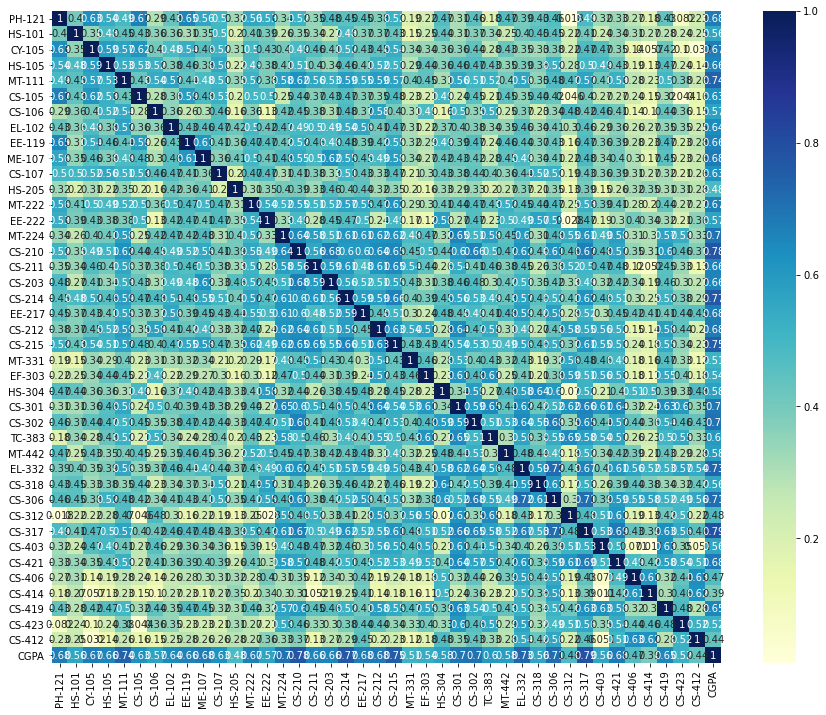

In [21]:
plt.figure(figsize=[15,12])
sns.heatmap(grade_std.corr(),annot=True, cmap='YlGnBu')

In [22]:
grade_std['CGPA'].max()

3.985

In [23]:
grade_std['CGPA'].min()

0.8

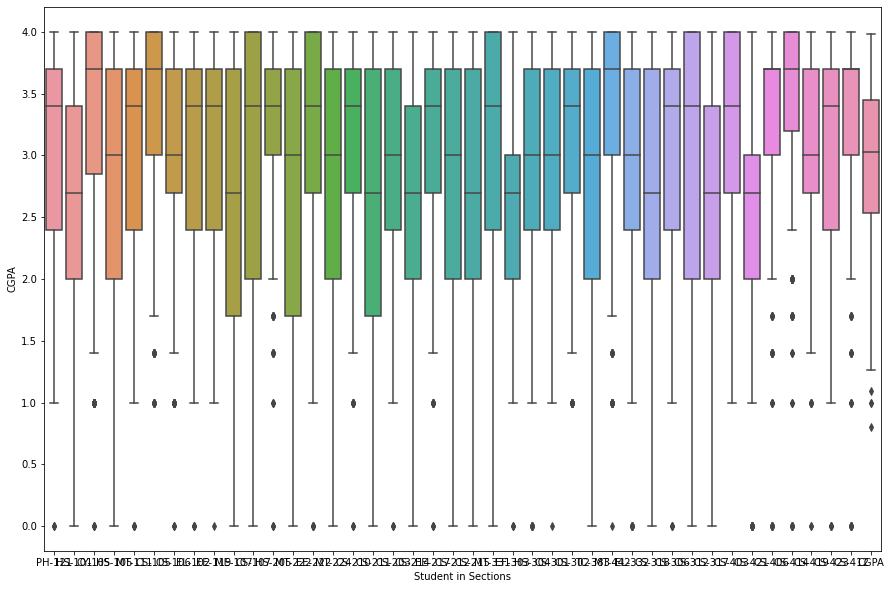

In [24]:
#lets find outlier using box plot


plt.figure(figsize = [15,10])
sns.boxplot(data = grade_std)
plt.xlabel ('Student in Sections')
plt.ylabel('CGPA')
plt.show()

We can clearly see data has outliers

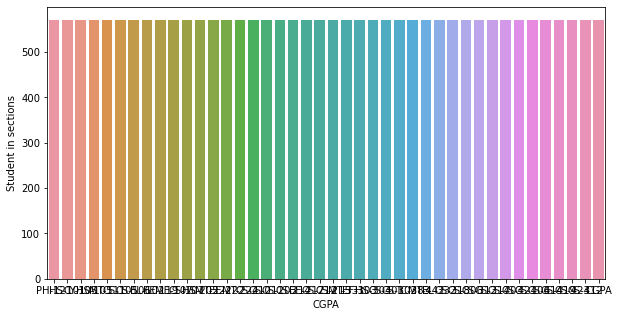

In [25]:
plt.figure(figsize = [10,5])
sns.countplot(data = grade_std)
plt.xlabel('CGPA')
plt.ylabel('Student in sections')
plt.show()

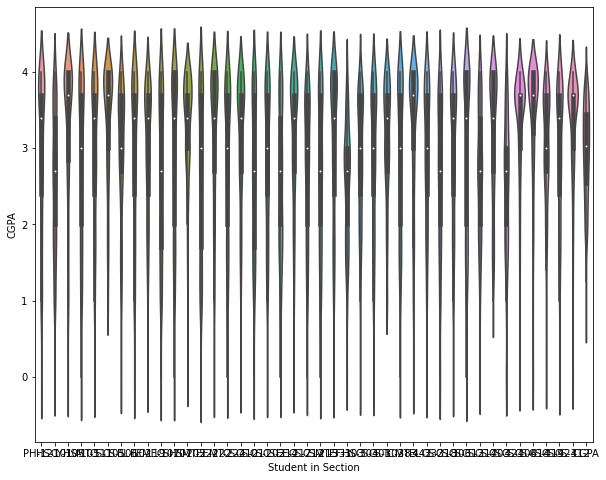

In [26]:
plt.figure(figsize = [10,8])
sns.violinplot(data = grade_std)
plt.xlabel('Student in Section')
plt.ylabel('CGPA')
plt.show()

D:\Amir Ali\Data Science\Anaconda\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


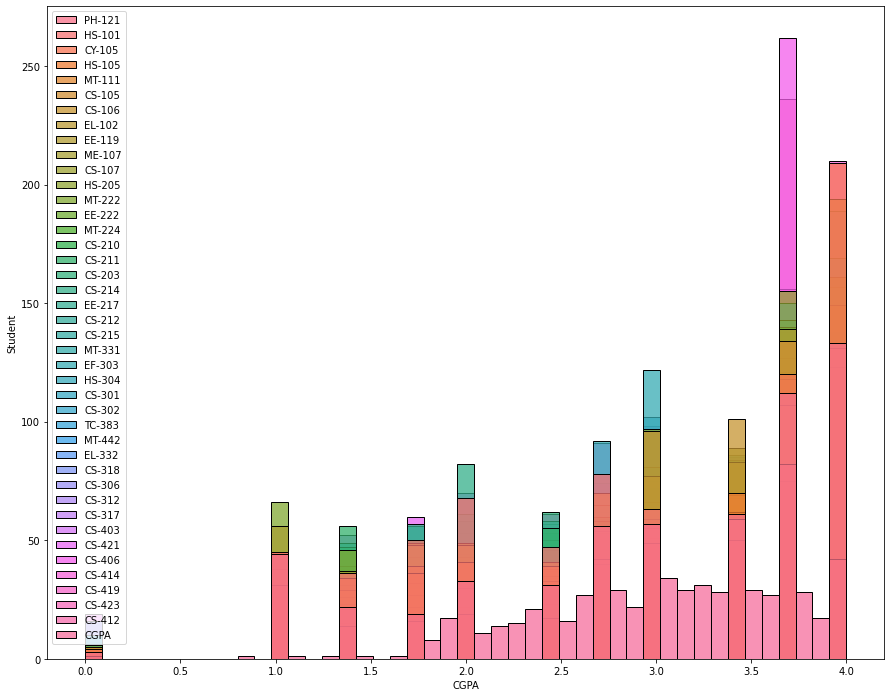

In [27]:
plt.figure(figsize = [15,12])
sns.histplot(data = grade_std)
plt.xlabel('CGPA')
plt.ylabel('Student')
plt.show()

In [28]:
grade_std.describe(include = 'all')

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.018389,2.628371,3.269702,2.885989,3.001051,3.329247,2.974956,2.982837,3.033100,2.711559,...,2.962347,2.707881,3.152890,2.514011,3.322942,3.440806,3.047811,2.997023,3.306130,2.954888
std,0.971594,0.908402,0.923424,1.013114,0.938643,0.799826,0.852357,0.966665,0.821065,1.018482,...,1.034341,0.869497,0.852533,0.908003,0.788436,0.767565,0.739991,0.880316,0.749513,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.400000,2.000000,2.850000,2.000000,2.400000,3.000000,2.700000,2.400000,2.400000,1.700000,...,2.000000,2.000000,2.700000,2.000000,3.000000,3.200000,2.700000,2.400000,3.000000,2.538000
50%,3.400000,2.700000,3.700000,3.000000,3.400000,3.700000,3.000000,3.400000,3.400000,2.700000,...,3.400000,2.700000,3.400000,2.700000,3.700000,3.700000,3.000000,3.400000,3.700000,3.029000
75%,3.700000,3.400000,4.000000,3.700000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,4.000000,3.400000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.451000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [29]:
grade_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    float64
 1   HS-101  571 non-null    float64
 2   CY-105  571 non-null    float64
 3   HS-105  571 non-null    float64
 4   MT-111  571 non-null    float64
 5   CS-105  571 non-null    float64
 6   CS-106  571 non-null    float64
 7   EL-102  571 non-null    float64
 8   EE-119  571 non-null    float64
 9   ME-107  571 non-null    float64
 10  CS-107  571 non-null    float64
 11  HS-205  571 non-null    float64
 12  MT-222  571 non-null    float64
 13  EE-222  571 non-null    float64
 14  MT-224  571 non-null    float64
 15  CS-210  571 non-null    float64
 16  CS-211  571 non-null    float64
 17  CS-203  571 non-null    float64
 18  CS-214  571 non-null    float64
 19  EE-217  571 non-null    float64
 20  CS-212  571 non-null    float64
 21  CS-215  571 non-null    float64
 22  MT

<AxesSubplot:xlabel='MT-331', ylabel='Count'>

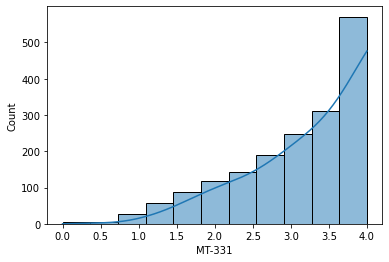

In [30]:
sns.histplot(grade_std['MT-331'], cumulative = True, kde = True)

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

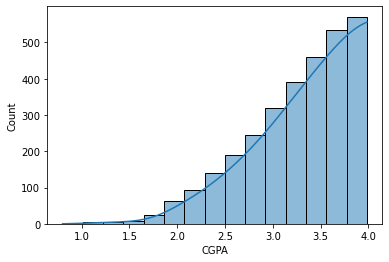

In [31]:
sns.histplot(grade_std['CGPA'], cumulative = True, kde = True)

D:\Amir Ali\Data Science\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

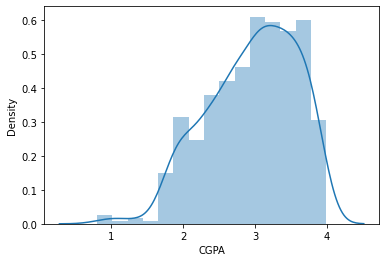

In [32]:
sns.distplot(grade_std['CGPA'])

In [33]:
#Lets split data into dependent and independent data

X = grade_std.drop(['CGPA'], axis = 1)
Y = grade_std['CGPA']
print(X.shape)
print(Y.shape)

(571, 41)
(571,)


In [34]:
#lets split data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .25, random_state = 30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(428, 41)
(143, 41)
(428,)
(143,)


In [35]:
#Lets import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [36]:
#Linear Regression
lr = LinearRegression() # instance
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test, Y_test)
print('Linear Regression Score : ', lr_score)


#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
dt_score = dt.score(X_test, Y_test)
print('Decision Tree Score : ',dt_score)

# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_score = knn.score(X_test, Y_test)
print('KNeighbors Regressor : ', knn_score)



Linear Regression Score :  0.9573809454912487
Decision Tree Score :  0.8610921789029791
KNeighbors Regressor :  0.9752868753547831


# Modle Evaluation

In [37]:
# Linear Regression
print('Linear Regression')

print('Mean Squared Error : ', mean_squared_error(Y_test, lr_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, lr_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, lr_pred)))
print('R2 Score : ', r2_score(Y_test, lr_pred))

Linear Regression
Mean Squared Error :  0.012631477208628658
Mean Absolute Error :  0.08593632122812925
Root Mean Squared Error :  0.11238984477535618
R2 Score :  0.9573809454912487


In [38]:
#Decision Tree Regressor

print('Decision Tree Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, dt_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, dt_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, dt_pred)))
print('R2 Score : ', r2_score(Y_test, dt_pred))

Decision Tree Regressor
Mean Squared Error :  0.041169636363636374
Mean Absolute Error :  0.1483776223776224
Root Mean Squared Error :  0.2029030220662974
R2 Score :  0.8610921789029791


In [39]:
#KNeighbors Regressor
print('KNeighbors Regressor')
print('Mean Squared Error : ', mean_squared_error(Y_test, knn_pred))
print('Mean Absolute Error : ', mean_absolute_error(Y_test, knn_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(Y_test, knn_pred)))
print('R2 Score : ', r2_score(Y_test, knn_pred))

KNeighbors Regressor
Mean Squared Error :  0.00732450013986015
Mean Absolute Error :  0.06583776223776229
Root Mean Squared Error :  0.08558329357918022
R2 Score :  0.9752868753547831


# Model Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#lets create and fit Ridge Regression model testing each alpha
alphavalue = {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model = Ridge()

grid = GridSearchCV(estimator = model, param_grid = alphavalue)

grid.fit(X_train, Y_train)
print(grid)

#lets summarize the results of the grid search

print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.9125848331774609
1
{'alpha': 1}


In [41]:
rd = Ridge(alpha = 0.1)
rd.fit(X_train,Y_train)
print(rd.coef_)
print('Score: ',rd.score(X_train, Y_train))

[ 0.08167098  0.04075933  0.06122026  0.02897362  0.01872423  0.09049502
  0.05527763  0.04129231  0.02510724  0.05307856  0.01242653  0.05441257
  0.00037383 -0.00455553  0.01628649  0.04606756  0.02885895 -0.00104863
  0.04976749  0.0038438  -0.00180343  0.02911533  0.02898377  0.025382
 -0.03081084  0.02379639  0.01093855  0.00798786 -0.00031252  0.04128988
  0.00701932  0.01927019  0.00019244  0.0515703  -0.01531328  0.0291774
  0.02607941  0.02025077 -0.02093625  0.05104544  0.01213636]
Score:  0.9400100715684339


In [42]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')  

knn_params = {"n_neighbors": np.arange(1, 50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=2)
knn_cv_model.fit(X_train, Y_train)
print("Best Parameters: " + str(knn_cv_model.best_params_))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s


Best Parameters: {'n_neighbors': 4}


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    9.6s finished


In [43]:
#Model Testing
knn_tuned = KNeighborsRegressor(n_neighbors=2)
knn_tuned.fit(X_train, Y_train)
knn_tuned_pred = knn_tuned.predict(X_test)
print('KNeighborsRegressor Tuned')
print('Mean Squared Error:', mean_squared_error(Y_test, knn_tuned_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, knn_tuned_pred)))
print('Mean Absolute Error:', mean_absolute_error(Y_test, knn_tuned_pred))
print('R2 Score:', r2_score(Y_test, knn_tuned_pred))

KNeighborsRegressor Tuned
Mean Squared Error: 0.015290893356643374
Root Mean Squared Error: 0.12365635186533433
Mean Absolute Error: 0.09422727272727277
R2 Score: 0.9484079805797285


Thanks!